# Data Science & Business Analytics Intern at the Sparks Foundation.

# Presented By: Komal Jain

# Task 1:Prediction Using Supervised ML

# GRIP FEB-21

# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 



In [2]:
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset


In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plotting the distribution of scores


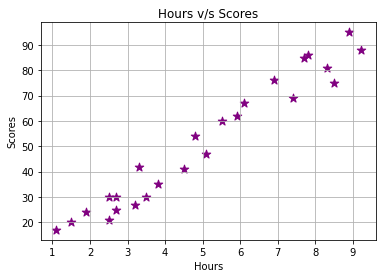

In [8]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours v/s Scores")
plt.grid(True)
plt.scatter(df.Hours,df.Scores,color="purple",marker="*",s=80)
plt.show()

<AxesSubplot:xlabel='Scores', ylabel='Density'>

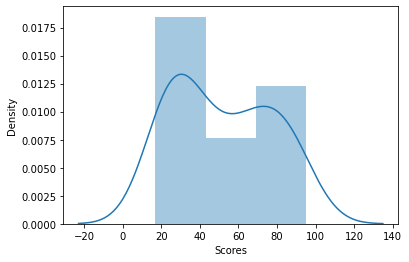

In [9]:
sns.distplot(df.Scores)

# Checking the correlation

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

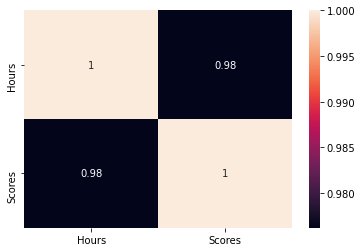

In [11]:
sns.heatmap(df.corr(),annot=True)

# Model initialization 

In [12]:
X = df.drop("Scores",axis = "columns")
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
Y = df.drop("Hours",axis = "columns")
Y.head()

,Scores
0,21
1,47
2,27
3,75
4,30



# Split data in training and testing

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
X_train.head()

,Hours
9,2.7
3,8.5
16,2.5
12,4.5
22,3.8


In [16]:
X_train.shape


(20, 1)

In [17]:
X_test

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


In [18]:
X_test.shape

(5, 1)

In [19]:
Y_train

,Scores
9,25
3,75
16,30
12,41
22,35
4,30
10,85
5,20
19,69
1,47


In [20]:
Y_train.shape

(20, 1)

In [21]:
Y_test

,Scores
14,17
0,21
17,24
6,88
23,76


In [22]:
Y_test.shape

(5, 1)

# Model Intilization

In [23]:
#Making an object names regression_model

regression_model=LinearRegression()

# Fit the data(train the model-independent,dependent variable-target variable) 


In [24]:
# fit function for training the model
regression_model.fit(X_test,Y_test)


LinearRegression()

# Prediction of percentage of an student based on the number of study hours.

In [25]:
Predicted_score = regression_model.predict([[9.25]])
Predicted_score                                           

array([[91.9762438]])

In [26]:
Predicted_score=regression_model.predict(X_test)
Predicted_score

array([[14.64837626],
       [27.93169093],
       [22.23884179],
       [91.50183971],
       [69.67925132]])

# Accuracy By score method

In [27]:
regression_model.score(X_test,Y_test)

0.976382645784569

In [28]:
regression_model.score(X_train,Y_train)

0.9401386397064545

# Slope,Intercept and Print Values

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test,Predicted_score)) 

Mean Absolute Error: 4.173412254039349


In [29]:
mse=mean_squared_error(Y_test,Predicted_score)
r2 = r2_score(Y_test,Predicted_score) 

In [30]:
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 
print('mean squared error: ', mse) 
print('Root mean squared error:',mse**0.5)
print('R2 score: ', r2) 

Slope: [[9.48808191]]
Intercept: [4.21148616]
mean squared error:  21.778979363301833
Root mean squared error: 4.666795406197044
R2 score:  0.976382645784569


# Our regression line has fit -97% accuracy of the model is 97%

# y=mx+c

In [31]:
2.5*9.48808191+4.21148616

27.931690935

In [32]:
scores_predicated = regression_model.predict(X)
scores_predicated

array([[27.93169093],
       [52.60070389],
       [34.57334826],
       [84.86018237],
       [37.41977284],
       [18.44360902],
       [91.50183971],
       [56.39593665],
       [82.96256599],
       [29.82930731],
       [77.26971685],
       [60.19116941],
       [46.90785474],
       [35.52215645],
       [14.64837626],
       [88.65541513],
       [27.93169093],
       [22.23884179],
       [62.08878579],
       [74.42329227],
       [29.82930731],
       [49.75427932],
       [40.26619741],
       [69.67925132],
       [78.21852504]])

In [33]:
df.Scores #actual scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

# Show the fit line on Predicted Values

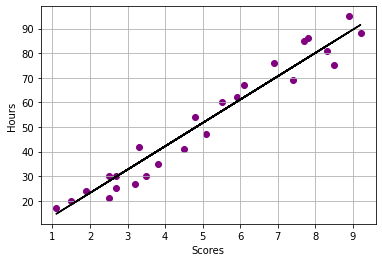

In [38]:
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.grid(True)
plt.scatter(df.Hours,df.Scores,color='purple',marker="o")

#predicated value
plt.plot(df.Hours,scores_predicated,color='black',)
plt.show()

# What will be Predicated Score if a student study for 9.25 hrs/day?

In [39]:
#Testing the model to redict the percentage of student if he studies for 9.25 hours as given
y = float(input("No of Hours:"))
Predicted_score = regression_model.predict(np.array([[y]]))
                                           
print("The Scores for {} Hours of study is {} ".format(y,Predicted_score))


No of Hours:9.25
The Scores for 9.25 Hours of study is [[91.9762438]] 


# Thank You...